# Boston House Price Prediction

### Boston Housing Dataset Attribute Information (in order):

- CRIM  :   per capita crime rate by town
- ZN    :   proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS :   proportion of non-retail business acres per town
- CHAS  :   Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX   :   nitric oxides concentration (parts per 10 million)
- RM    :   average number of rooms per dwelling
- AGE   :   proportion of owner-occupied units built prior to 1940
- DIS   :   weighted distances to five Boston employment centres
- RAD   :   index of accessibility to radial highways
- TAX   :   full-value property-tax rate per $10,000

- PTRATIO : pupil-teacher ratio by town
- B       : 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT   : % lower status of the population
- MEDV    : Median value of owner-occupied homes in $1000's

### Importing Library

In [247]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Extracting Data from CSV File

In [12]:
df = pd.read_csv('Boston Dataset.csv')
df

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


### Exploring the Data

In [15]:
df.drop(columns=['Unnamed: 0'],axis=0,inplace=True)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [19]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [13]:
df.shape

(506, 14)

In [15]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

### Plotting the Graphs for better understanding of data

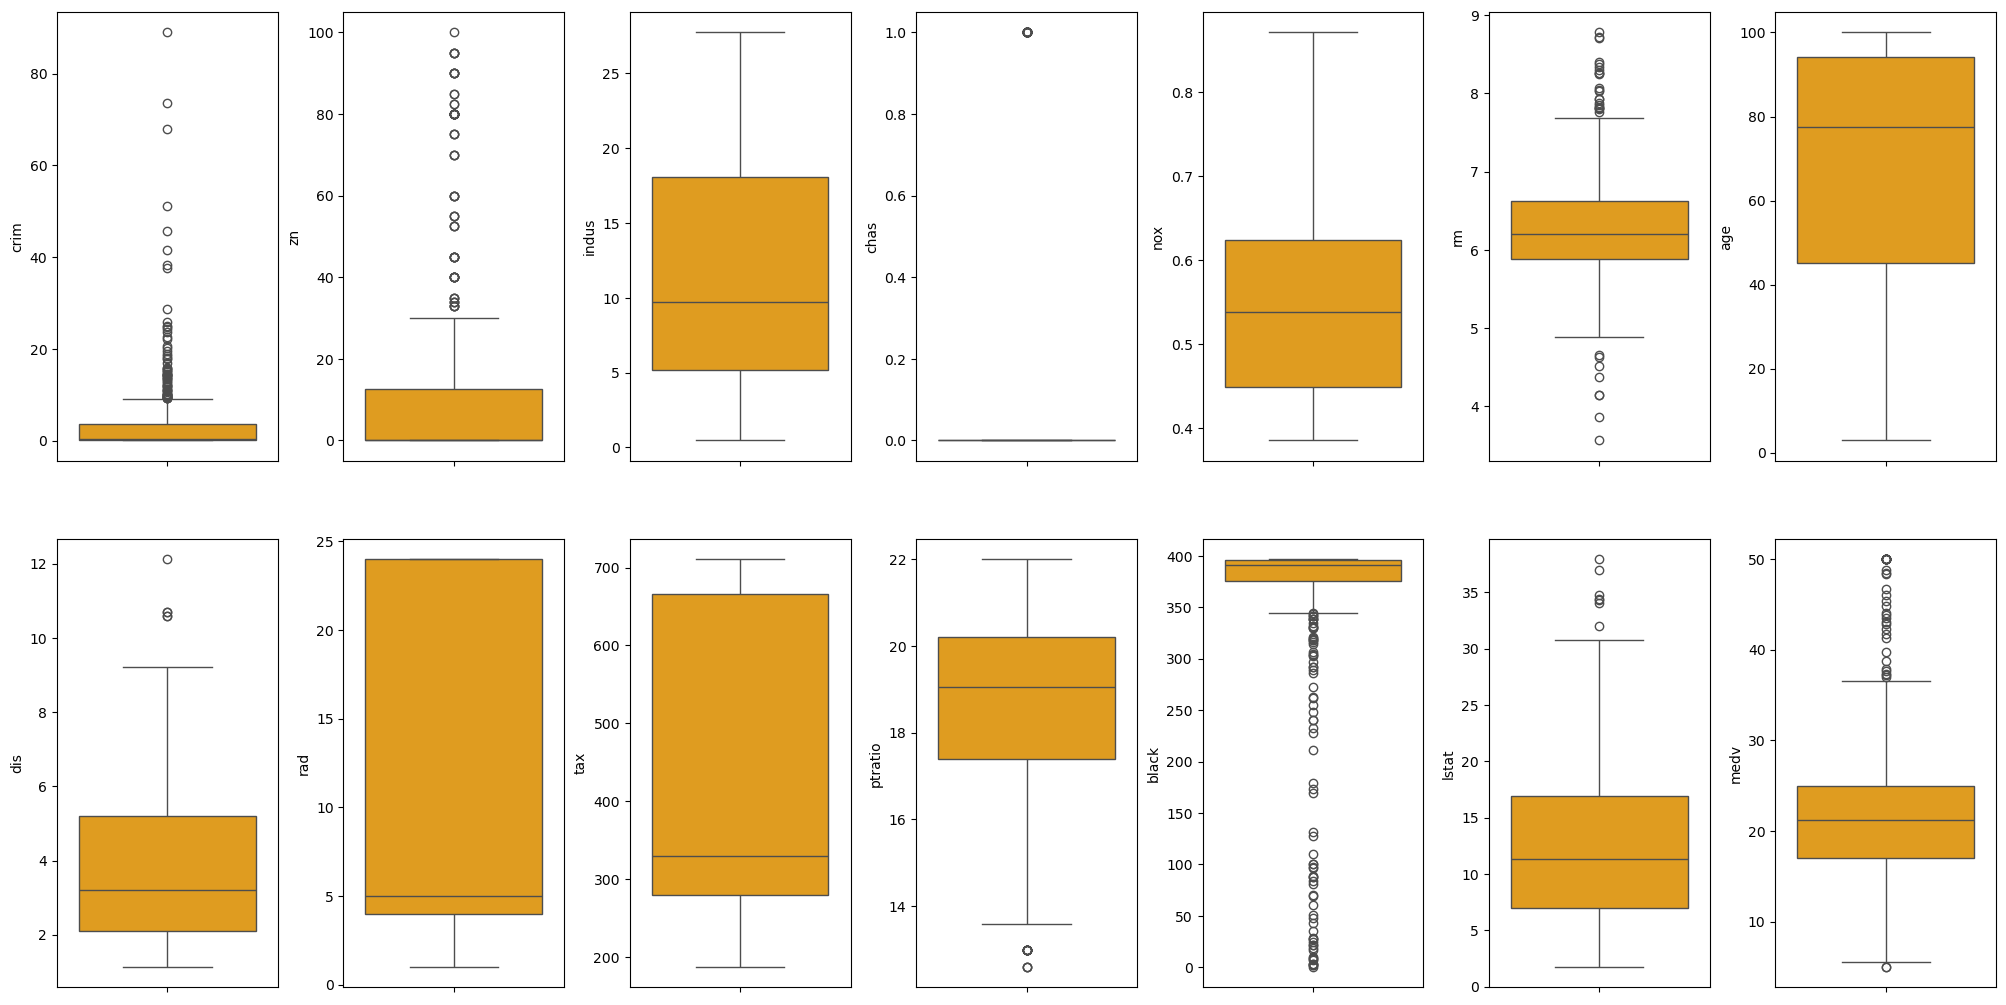

In [23]:
fig,ax=plt.subplots(ncols=7,nrows=2, figsize=(20,10))
index=0
ax=ax.flatten()
for col, value in df.items():
    sns.boxplot(y=col, data=df,ax=ax[index],color='Orange')
    index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5)

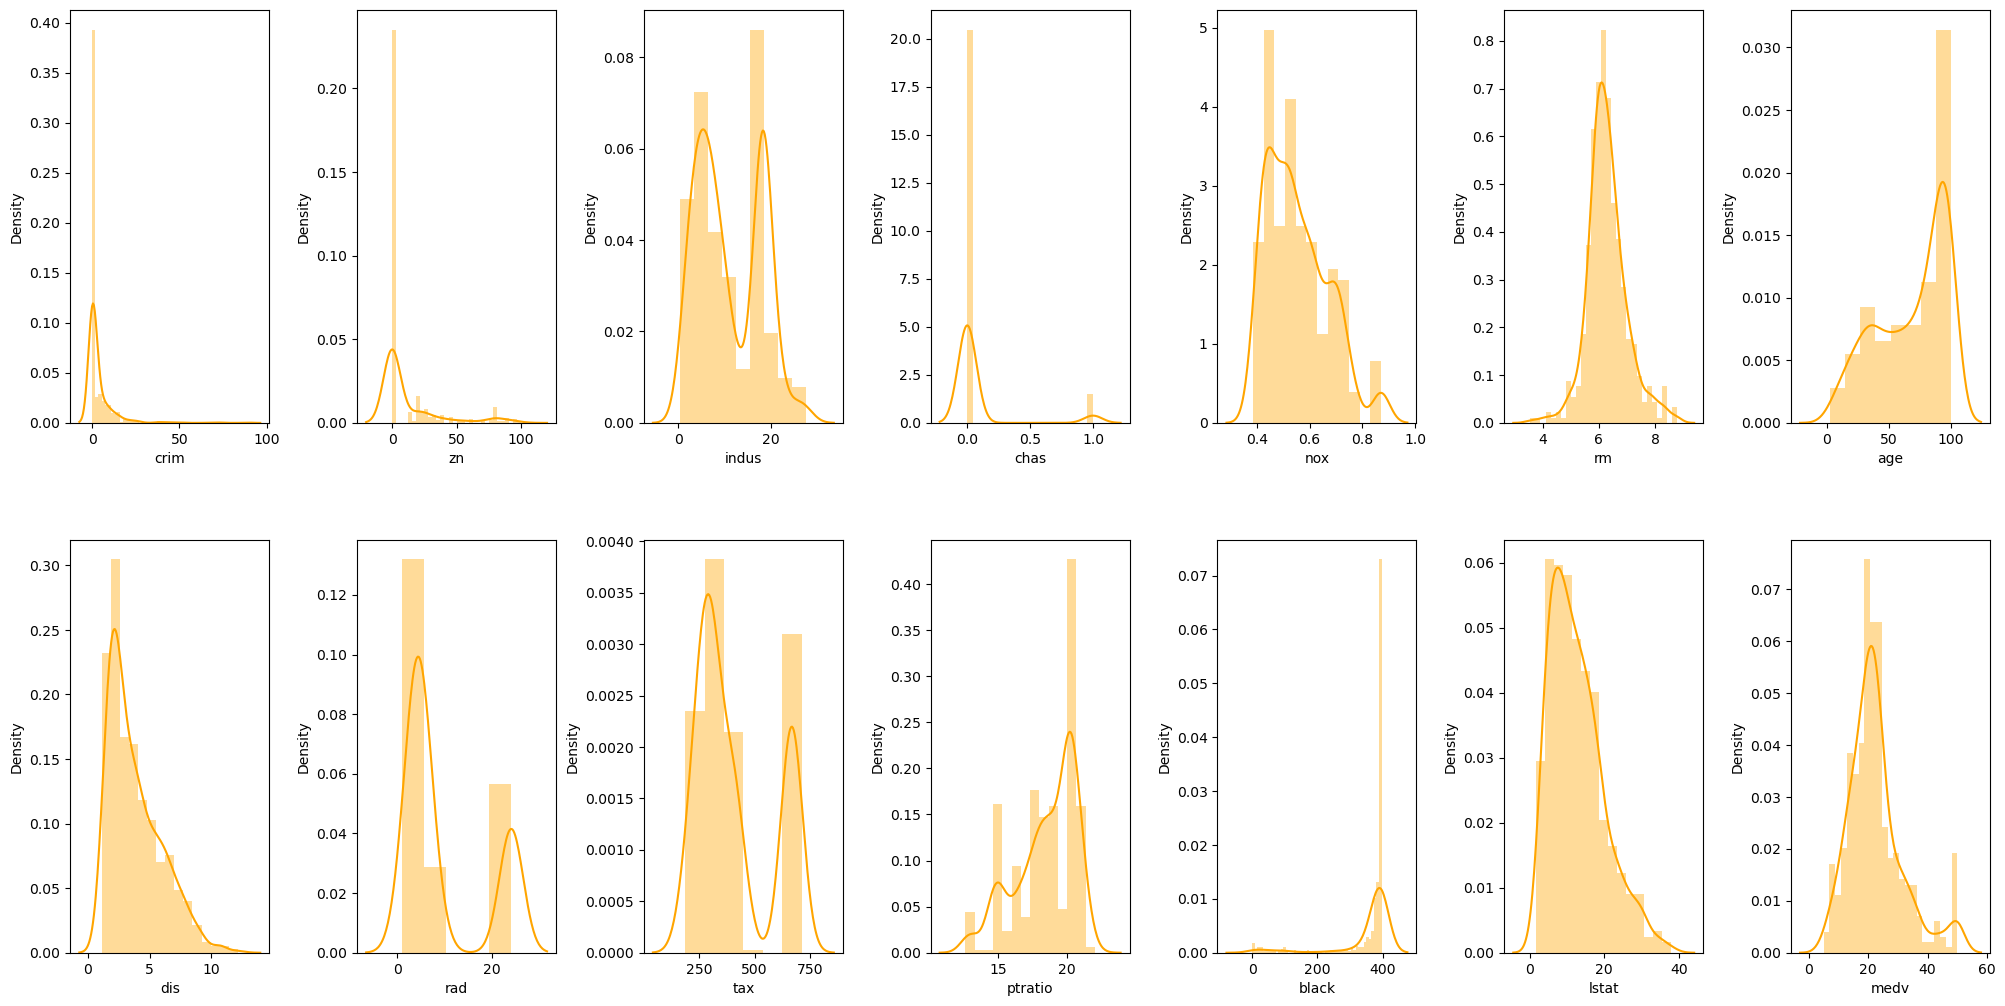

In [25]:
fig,ax=plt.subplots(ncols=7, nrows=2, figsize=(20,10))
index=0
ax=ax.flatten()
for col, value in df.items():
    sns.distplot(value,ax=ax[index],color='Orange')
    index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5)

### Preprocessing the Data

In [33]:
#Scaling the Data
from sklearn import preprocessing
cols=['crim','zn','tax','black']
scaler = preprocessing.StandardScaler()
df1=scaler.fit_transform(df[cols])
df1=pd.DataFrame(df1,columns=cols)
df1.head()

,crim,zn,tax,black
0,-0.419782,0.284830,-0.666608,0.441052
1,-0.417339,-0.487722,-0.987329,0.441052
2,-0.417342,-0.487722,-0.987329,0.396427
3,-0.416750,-0.487722,-1.106115,0.416163
4,-0.412482,-0.487722,-1.106115,0.441052


In [35]:
df1.shape

(506, 4)

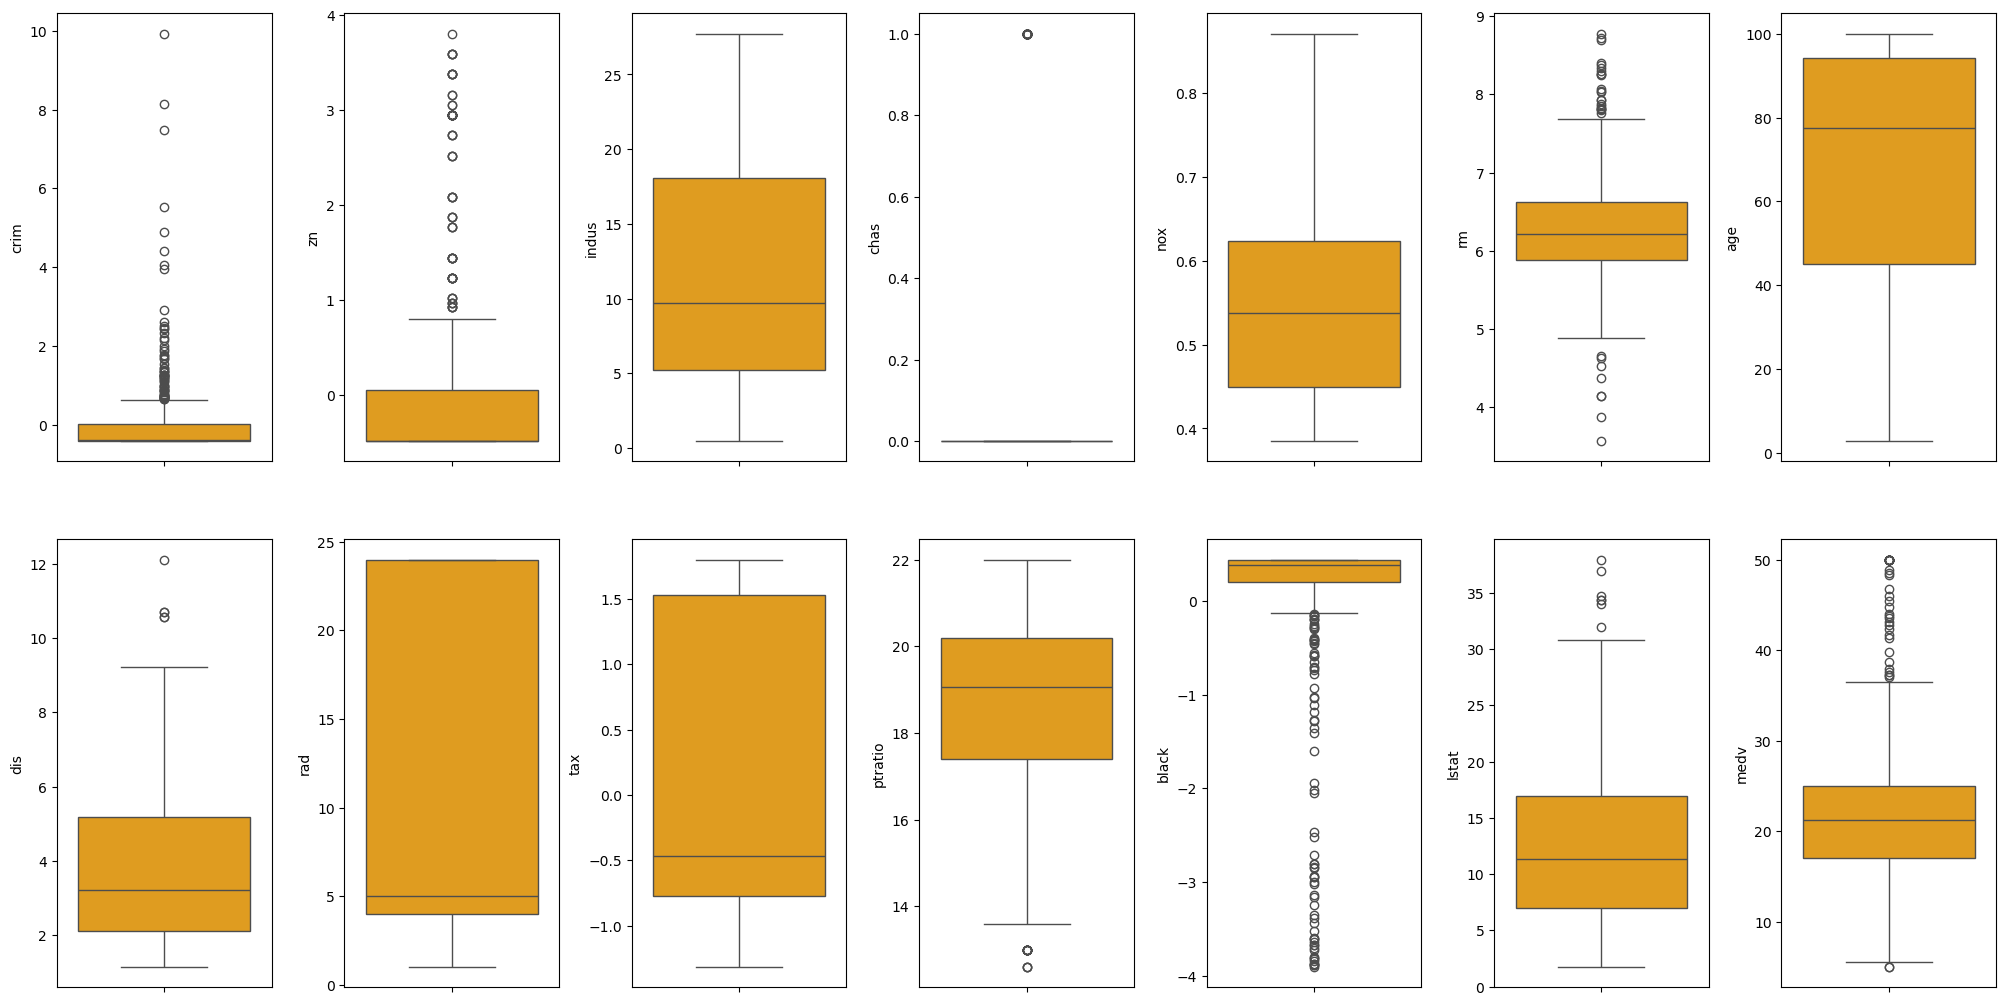

In [39]:
for i in df1:
    df[cols]=df1[cols]
fig,ax=plt.subplots(ncols=7,nrows=2,figsize=(20,10))
index=0
ax=ax.flatten()
for col,value in df.items():
    sns.boxplot(y=col,data=df,ax=ax[index],color='Orange')
    index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5)

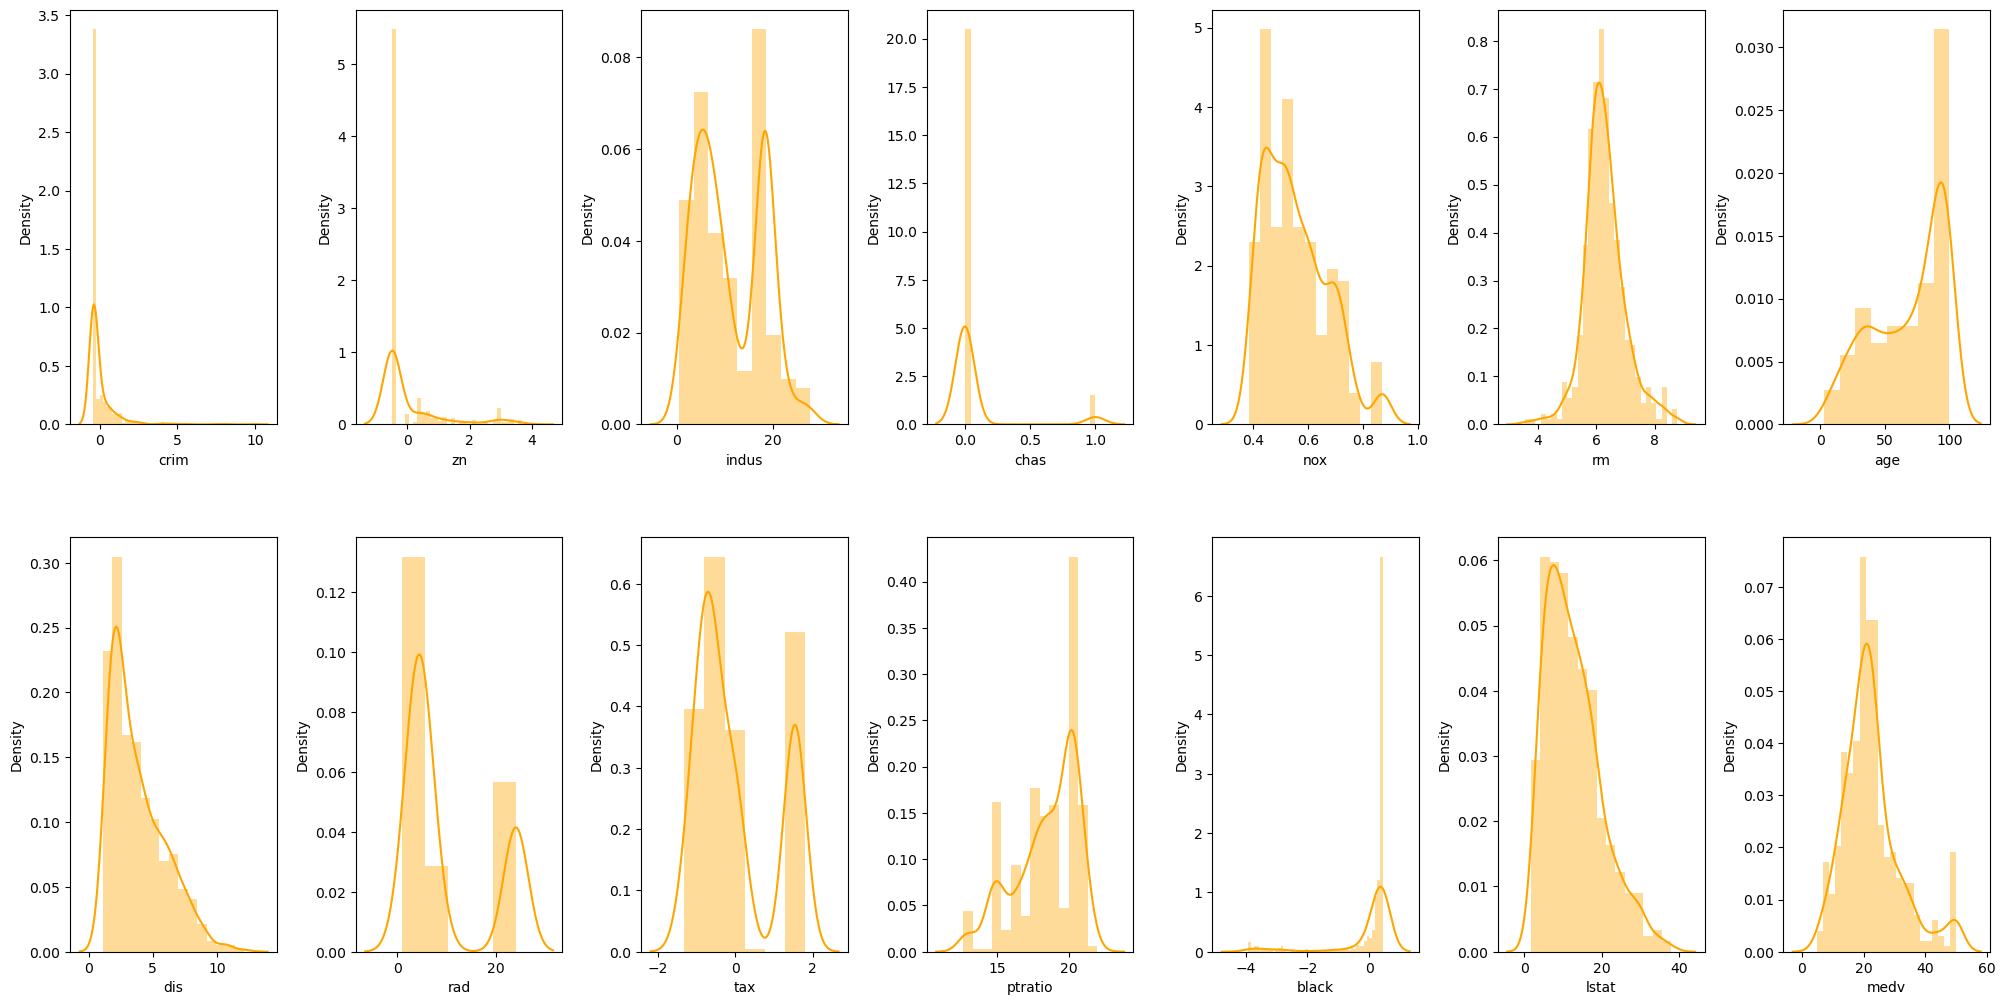

In [43]:
fig,ax=plt.subplots(ncols=7,nrows=2, figsize=(20,10))
index=0
ax=ax.flatten()
for col, value in df.items():
    sns.distplot(value,ax=ax[index],color='Orange')
    index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5)

In [45]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,5.060000e+02,5.060000e+02,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,5.060000e+02,506.000000,506.000000
mean,-1.123388e-16,7.898820e-17,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,0.000000,18.455534,-7.442444e-16,12.653063,22.532806
std,1.000990e+00,1.000990e+00,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,1.000990,2.164946,1.000990e+00,7.141062,9.197104
min,-4.197819e-01,-4.877224e-01,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,-1.313990,12.600000,-3.907193e+00,1.730000,5.000000
25%,-4.109696e-01,-4.877224e-01,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,-0.767576,17.400000,2.050715e-01,6.950000,17.025000
50%,-3.906665e-01,-4.877224e-01,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,-0.464673,19.050000,3.811865e-01,11.360000,21.200000
75%,7.396560e-03,4.877224e-02,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,1.530926,20.200000,4.336510e-01,16.955000,25.000000
max,9.933931e+00,3.804234e+00,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,1.798194,22.000000,4.410519e-01,37.970000,50.000000


<Axes: >

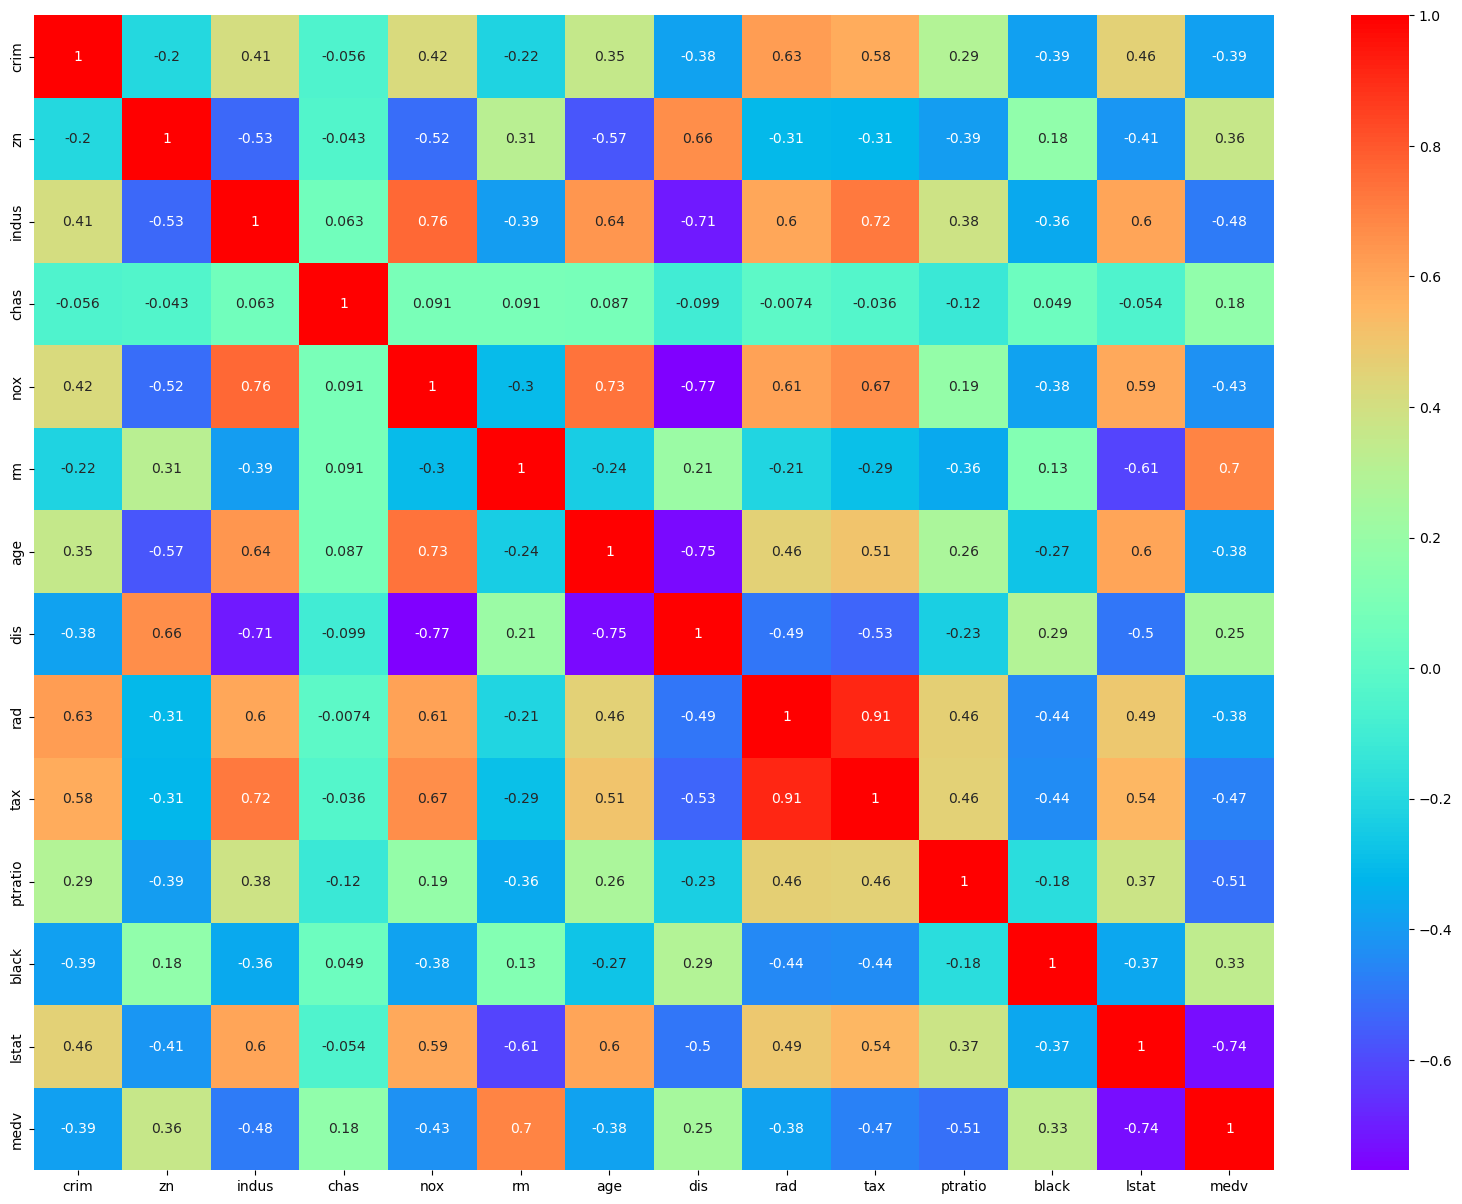

In [49]:
corr = df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True,cmap='rainbow')

In [51]:
df.drop(columns=['rad'],inplace=True)
df

,crim,zn,indus,chas,nox,rm,age,dis,tax,ptratio,black,lstat,medv
0,-0.419782,0.284830,2.31,0,0.538,6.575,65.2,4.0900,-0.666608,15.3,0.441052,4.98,24.0
1,-0.417339,-0.487722,7.07,0,0.469,6.421,78.9,4.9671,-0.987329,17.8,0.441052,9.14,21.6
2,-0.417342,-0.487722,7.07,0,0.469,7.185,61.1,4.9671,-0.987329,17.8,0.396427,4.03,34.7
3,-0.416750,-0.487722,2.18,0,0.458,6.998,45.8,6.0622,-1.106115,18.7,0.416163,2.94,33.4
4,-0.412482,-0.487722,2.18,0,0.458,7.147,54.2,6.0622,-1.106115,18.7,0.441052,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,11.93,0,0.573,6.593,69.1,2.4786,-0.803212,21.0,0.387217,9.67,22.4
502,-0.415249,-0.487722,11.93,0,0.573,6.120,76.7,2.2875,-0.803212,21.0,0.441052,9.08,20.6
503,-0.413447,-0.487722,11.93,0,0.573,6.976,91.0,2.1675,-0.803212,21.0,0.441052,5.64,23.9
504,-0.407764,-0.487722,11.93,0,0.573,6.794,89.3,2.3889,-0.803212,21.0,0.403225,6.48,22.0


<Axes: >

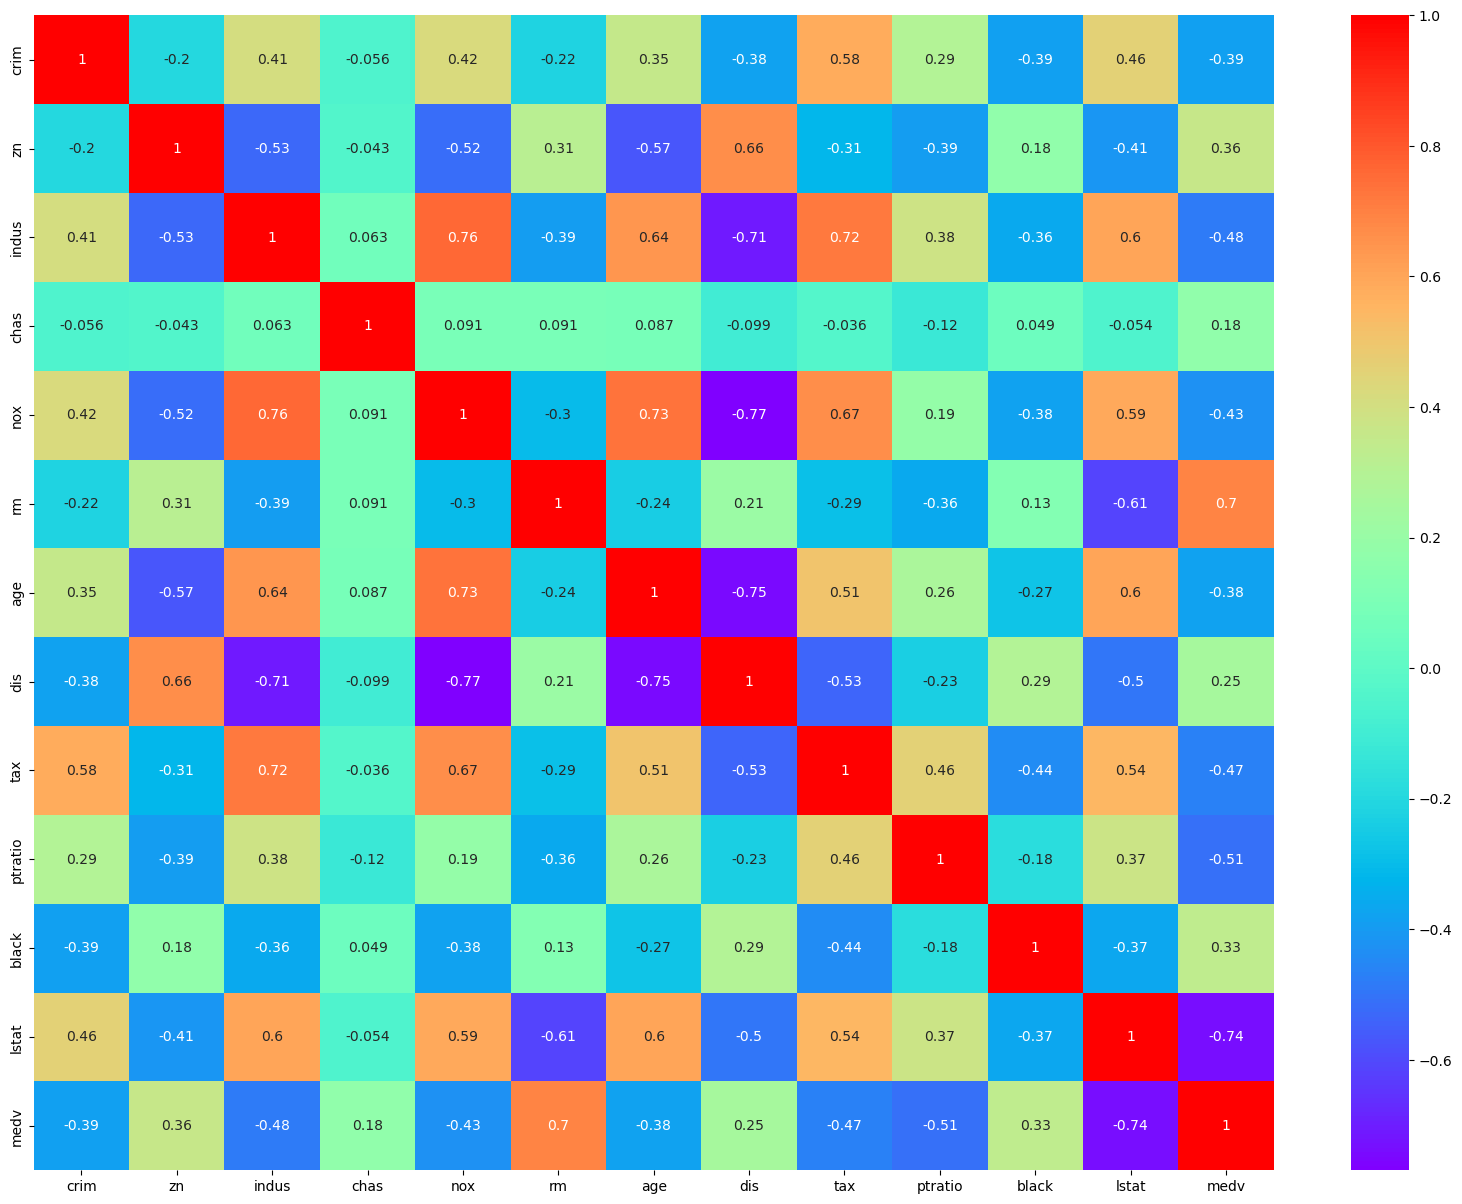

In [55]:
corr = df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True,cmap='rainbow')

### Generating Scatter Plot to Understand Correlation

<Axes: xlabel='lstat', ylabel='medv'>

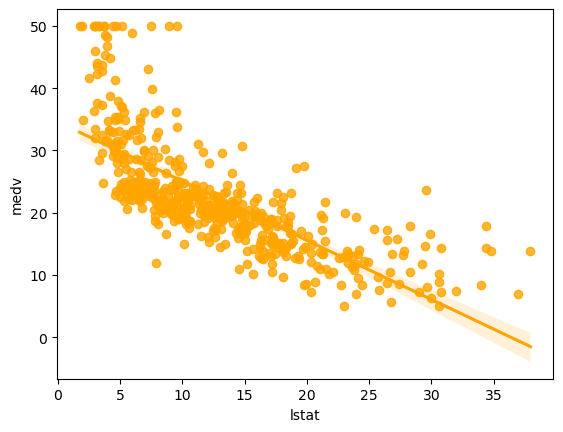

In [59]:
sns.regplot(y=df['medv'],x=df['lstat'],color='Orange')

<Axes: xlabel='tax', ylabel='medv'>

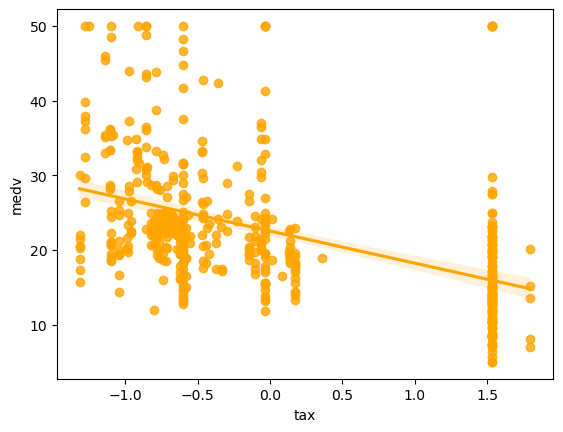

In [61]:
sns.regplot(y=df['medv'],x=df['tax'],color='Orange')

<Axes: xlabel='rm', ylabel='medv'>

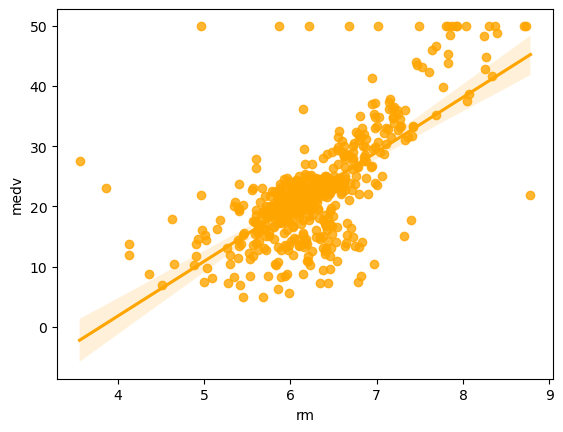

In [63]:
sns.regplot(y=df['medv'],x=df['rm'],color='Orange')

In [57]:
X=df.drop(columns=['medv'],axis=1)
Y=df["medv"]

### Training The Model

In [59]:
#Importing the required library for building a ML Model
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [61]:
# A list has been created to store r2 score value
store_r2value=[]

In [63]:
# Creating a function for training the ML Model
def train(model,X,Y):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25)
    model.fit(X_train,Y_train)
    pred=model.predict(X_test)
    cvscore=cross_val_score(model,X,Y,scoring='neg_mean_squared_error',cv=10)
    cvscore=np.abs(np.mean(cvscore))
    score=r2_score(pred,Y_test)
    store_r2value.append(score)
    print("Model Report")
    print("MSE",mean_squared_error(Y_test,pred))
    print("cvscore",cvscore)
    print("R square ",score)

Model Report
MSE 19.11158729778842
cvscore 34.705255944524865
R square  0.6831109347248149


<Axes: title={'center': 'model coefficient'}>

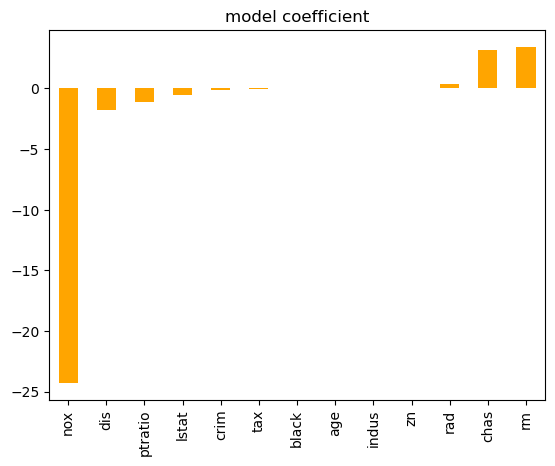

In [257]:
# Loading the Linear Regression Module
from sklearn.linear_model import LinearRegression
model=LinearRegression()
train(model,X,Y)
coef=pd.Series(model.coef_,X.columns).sort_values()
coef.plot(kind='bar',title="model coefficient",color='Orange')

### Printing Model Accuracy

In [183]:
print("Maximum Value of r2 score : ",max(store_r2value))

Maximum Value of r2 score :  0.7825335635545314


(array([1., 0., 0., 2., 0., 1., 4., 2., 3., 0., 4., 8., 2., 6., 8., 3., 4.,
        2., 1., 2.]),
 array([0.36249007, 0.38349225, 0.40449442, 0.42549659, 0.44649877,
        0.46750094, 0.48850312, 0.50950529, 0.53050747, 0.55150964,
        0.57251182, 0.59351399, 0.61451617, 0.63551834, 0.65652052,
        0.67752269, 0.69852487, 0.71952704, 0.74052921, 0.76153139,
        0.78253356]),
 <BarContainer object of 20 artists>)

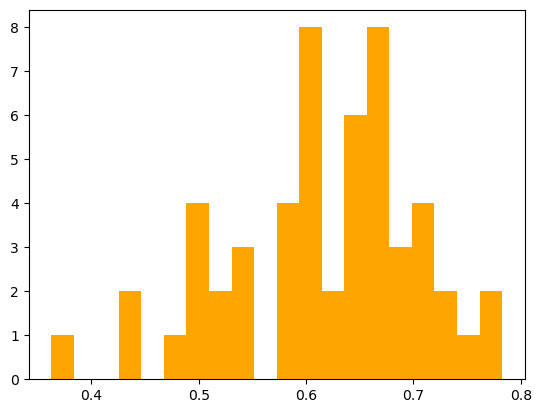

In [255]:
#Plotting histogram of r2 score data obtained during model training
plt.hist(store_r2value,bins=20,color='Orange')